#**Libraries**

In [2]:
import datetime as dt
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

#**Importing Bitcoin Data** 

In [ ]:
URL='https://api.coindesk.com/v1/bpi/historical/close.json?'

start=dt.date(2017,1,1)
end=dt.date(2020,11,5)

url=f'{URL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'
results=requests.get(url)
results.content

In [10]:
data=pd.read_json(results.content).iloc[:-2,:1]
data.index.name = 'date'
data.index=pd.to_datetime(data.index)
# data

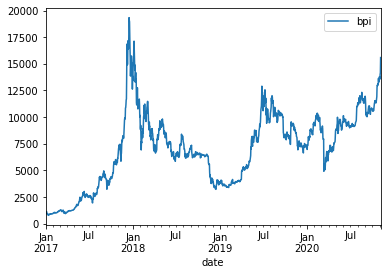

In [11]:
data.plot()

#**Resampling**

In [ ]:
data.resample('M').mean().plot()

#**Differentiation**

In [ ]:
data.diff().plot()

#**Shifting**

In [ ]:
data.shift()

In [ ]:
data-data.shift()

In [ ]:
data.tshift()

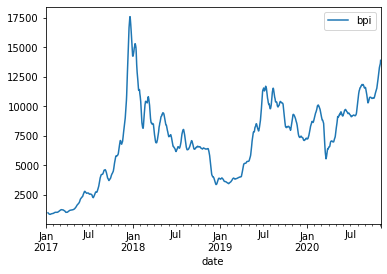

In [37]:
data.rolling(window=10).mean().plot()#Moving average 

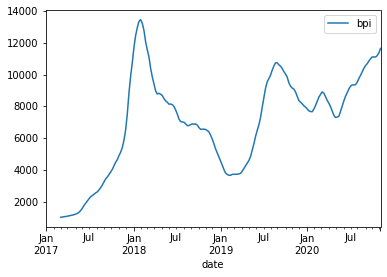

In [38]:
data.resample('W').mean().rolling(window=10).mean().plot()#Moving Avg of weekly data 

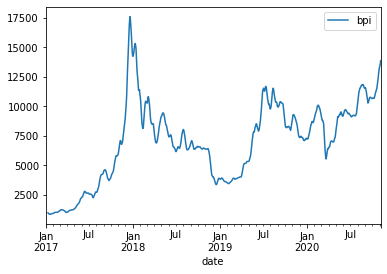

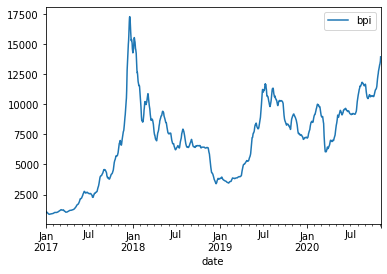

In [41]:
data.rolling(window=10,win_type='gaussian').mean(std=10).plot()#Exp wt avg
data.ewm(span=10).mean().plot()

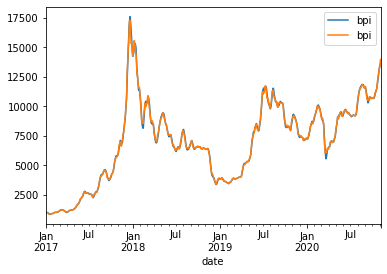

In [53]:
pd.concat([data.rolling(window=10,win_type='gaussian').mean(std=100),data.ewm(span=10).mean()],axis=1).plot()